# <span style="color:purple"> **CAPSTONE PROJECT: E-COMMERCE BUSINESS ANALYSIS** </span>

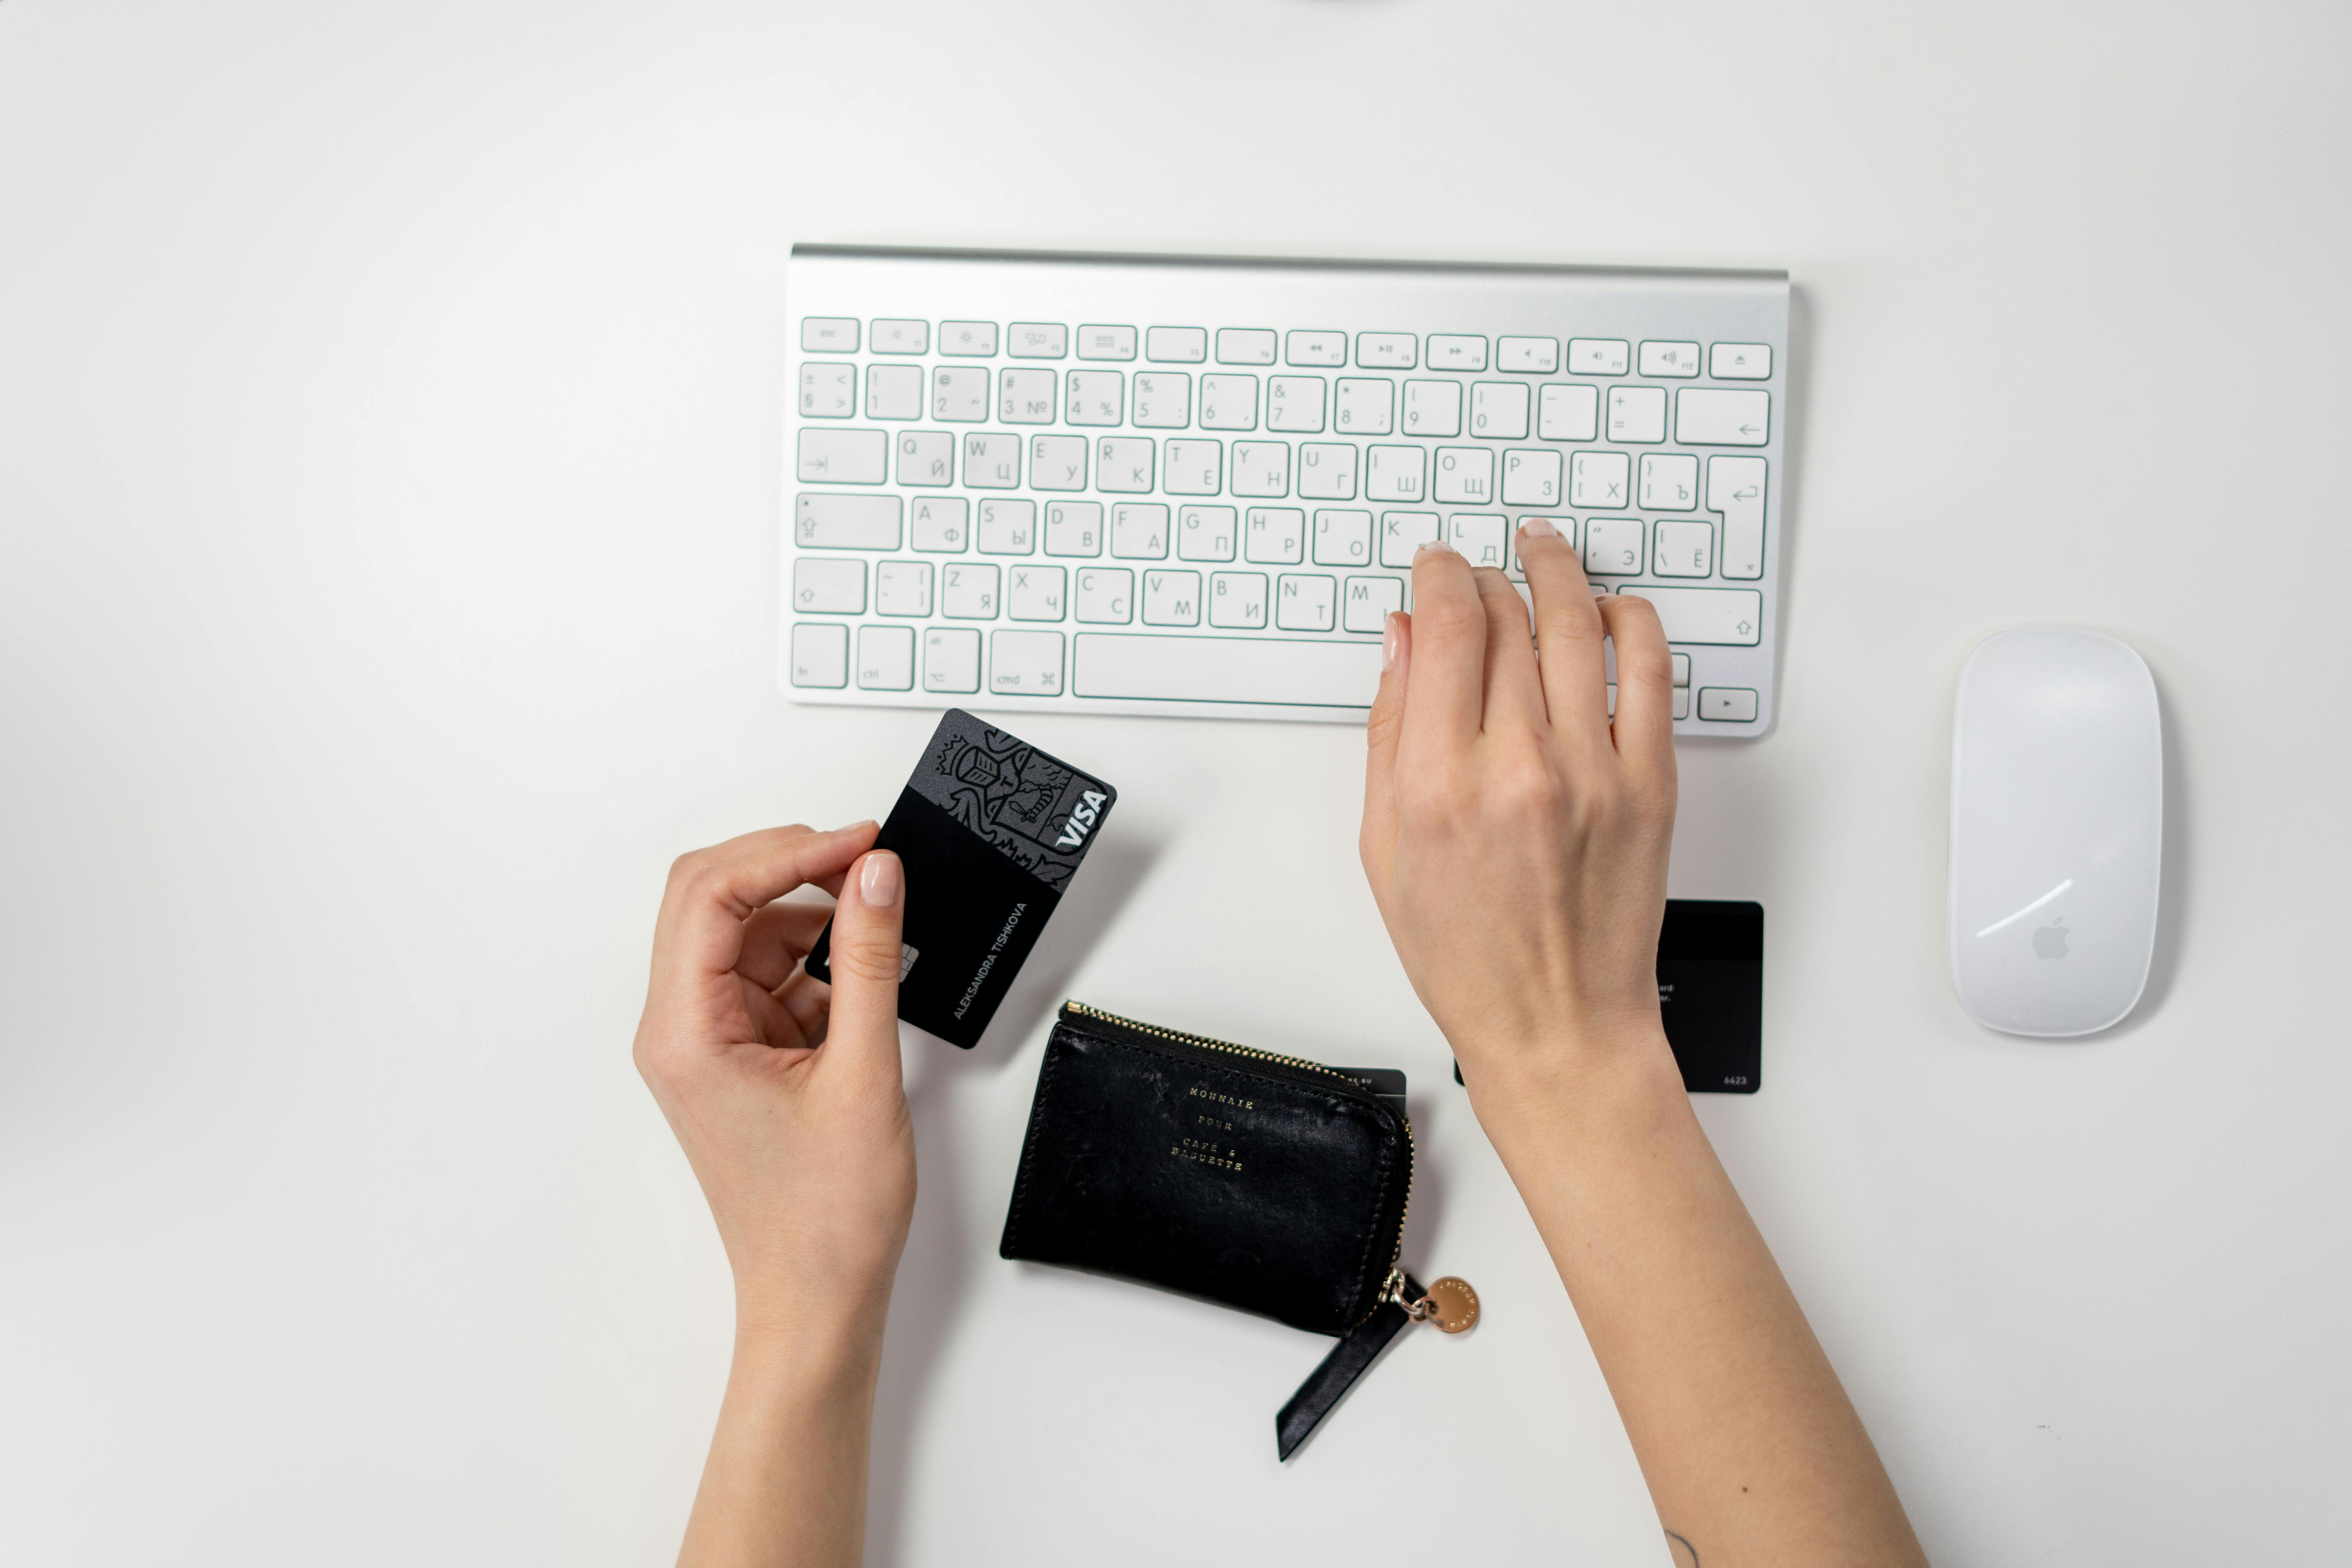

## <span style="color:purple"> **Context:** </span>

As an e-commerce warehouse provider, it's vital to keep track of the performance of our product portfolio. Recently, we've observed an increase in customer churn, leading to revenue losses.

This analysis will focus across 4 core themes on a macro and micro level:

<li>Geographical Analysis</li>
<li>Seasonality</li>
<li>Product Analysis</li>
<li>Customer loyalty/Churn</li>


## <span style="color:purple"> **Objective:** </span>

The objective of this analysis is to understand product performance across different geographic markets in order to identify the drivers behind the churn phenomenon, enabling us to implement targeted interventions for retention.

## <span style="color:purple"> **Libraries needed:** </span>

For this project I will be using three basic libraries

**Pandas**: for data analysis

**Numpy**: for data structure and mathematical operations

**Matplotlib.pyplot** for data visualization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import datetime as dt
warnings.filterwarnings('ignore')
plt.style.use("tableau-colorblind10")

## <span style="color:purple"> **Data import:** </span>

Source: https://www.kaggle.com/datasets/gabrielramos87/an-online-shop-business

In [3]:
dataframe = pd.read_csv('Sales Transaction v.4a copy.csv')

## <span style="color:purple"> **Data exploration and cleaning:** </span>

In [4]:
dataframe.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


CustomerNo has an integer datatype when it's actually a key, so let's fix that chaging it's datatype to a string 

In [6]:
dataframe['CustomerNo'] = dataframe['CustomerNo'].astype(str)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536350 non-null  object 
 7   Country        536350 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 32.7+ MB


Now I change the date format of the 'Date' column so python recognizes it as a date

In [7]:
dataframe['Date'] = pd.to_datetime(dataframe['Date'],format='%m/%d/%Y')

What period of time is our data in?

In [8]:
print("Date of earliest entry: ",dataframe['Date'].min())
print("Date of latest entry: ",dataframe['Date'].max())

Date of earliest entry:  2018-12-01 00:00:00
Date of latest entry:  2019-12-09 00:00:00


The source of the data provided the information about cancelled transactions, which appear as transactions that start with a 'C'

In [9]:
dataframe['TransactionNo']

0          581482
1          581475
2          581475
3          581475
4          581475
           ...   
536345    C536548
536346    C536548
536347    C536548
536348    C536548
536349    C536548
Name: TransactionNo, Length: 536350, dtype: object

How many countries does the business sell to?

In [10]:
len(dataframe['Country'].unique())

38

Is there any null values?

In [11]:
dataframe[dataframe.columns[dataframe.isnull().any()]]

""
0
1
2
3
4
...
536345
536346
536347
536348


## <span style="color:purple"> **DATA PREPARATION:** </span>

First, I subset my dataframe in order to analyze UK sales separate from sales to other parts of the world

In [12]:
# Conditions 
UK = dataframe['Country'].isin(['United Kingdom'])
Not_UK = ~dataframe['Country'].isin(['United Kingdom'])
Canceled = dataframe['TransactionNo'].str.contains('C')
Not_canceled = ~dataframe['TransactionNo'].str.contains('C')
#Subsets
UK_Dataframe = dataframe[UK & Not_canceled]
Not_UK_Dataframe = dataframe[Not_UK & Not_canceled]
Cancel_UK = dataframe[UK & Canceled]
Cancel_Out_UK = dataframe[Not_UK & Canceled]

Now, we create a colum containing total sales for all subsets

In [13]:
dataframe['Sales'] = dataframe['Price']* dataframe['Quantity']
UK_Dataframe['Sales'] = UK_Dataframe['Price']* UK_Dataframe['Quantity']
Not_UK_Dataframe['Sales'] = Not_UK_Dataframe['Price']* Not_UK_Dataframe['Quantity']
Cancel_UK['Sales'] = Cancel_UK['Price']* Cancel_UK['Quantity']
Cancel_Out_UK['Sales'] = Cancel_Out_UK['Price']* Cancel_Out_UK['Quantity']

<span style="color:purple"> **Total Sales:** </span>

In [14]:
pd.options.display.float_format = "{:.2f}".format

In [15]:
dataframe['Sales'].sum()

60280024.26000001

<span style="color:purple"> **Total Transactions:** </span>

In [16]:
dataframe['TransactionNo'].count()

536350

<span style="color:purple"> **Total Customers:** </span>

In [17]:
len(dataframe['CustomerNo'].unique())

4739

<span style="color:purple"> **Total Products:** </span>

In [18]:
len(dataframe['ProductName'].unique())

3768

<span style="color:purple"> **Total Cancelled Orders:** </span>

In [19]:
Canceled[Canceled].count()

8585

# <span style="color:purple"> **GEOGRAPHICAL ANALYSIS** </span> 

Where are sales concentrated?

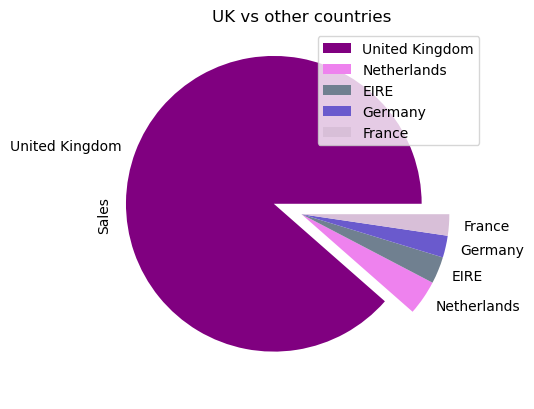

In [61]:
Customers = dataframe.groupby(['Country'])['Sales'].sum().sort_values(ascending=False).head(5)

Customers.plot(kind='pie', x='Country', y='Sales',explode = [0.2,0,0,0,0], colors=['purple','violet','slategray','slateblue','thistle'])
plt.title('UK vs other countries')
plt.legend(loc='upper right')
plt.show()

In [21]:
print('United Kingdom sales:',dataframe[UK]['Sales'].sum(),'representing a', (dataframe[UK]['Sales'].sum()/dataframe['Sales'].sum())*100, '% of Total Sales')
print('Other Countries sales:',dataframe[Not_UK]['Sales'].sum(),'representing a',(dataframe[Not_UK]['Sales'].sum()/dataframe['Sales'].sum())*100, '% of Total Sales')

United Kingdom sales: 49994030.17000002 representing a 82.93631395097917 % of Total Sales
Other Countries sales: 10285994.090000002 representing a 17.063686049020845 % of Total Sales


Now let's see where are the most sales outside of the United Kingdom

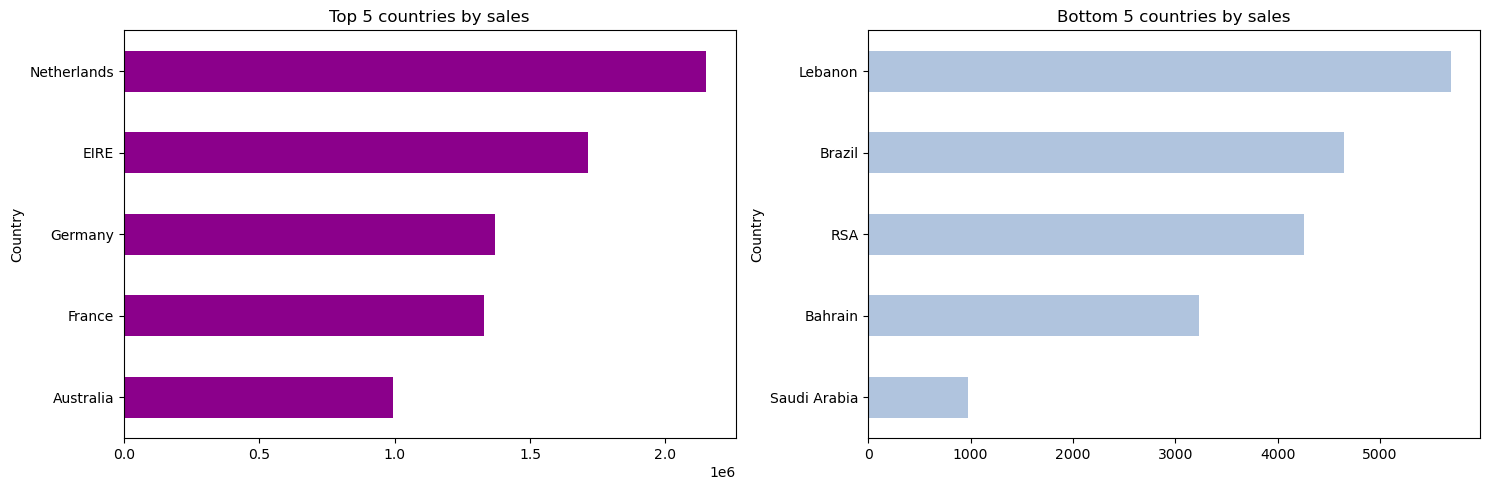

In [41]:
top_countries = Not_UK_Dataframe.groupby(['Country'])['Sales'].sum().sort_values(ascending=True).tail(5)
bot_countries = Not_UK_Dataframe.groupby(['Country'])['Sales'].sum().sort_values(ascending=True).head(5)

fig, axes = plt.subplots(1,2, figsize=(15,5))

top_countries.plot(kind='barh', ax=axes[0], color='darkmagenta')
axes[0].set_title("Top 5 countries by sales")
bot_countries.plot(kind='barh', ax=axes[1], color='lightsteelblue')
axes[1].set_title("Bottom 5 countries by sales")
plt.tight_layout()
plt.style.use("tableau-colorblind10")
plt.show()


Saudi Arabia was the country with the lowest sales during the year with about £0.9K.

Nearby countries seem to be more likely to buy our products since the shipping fee and time will be a lot lower, which explains why countries from farther away continents present lower sales.

# <span style="color:purple"> **UK SEASONALITY ANALYSIS** </span> 

## <span style="color:purple"> **SALES ANALYSIS** </span> 

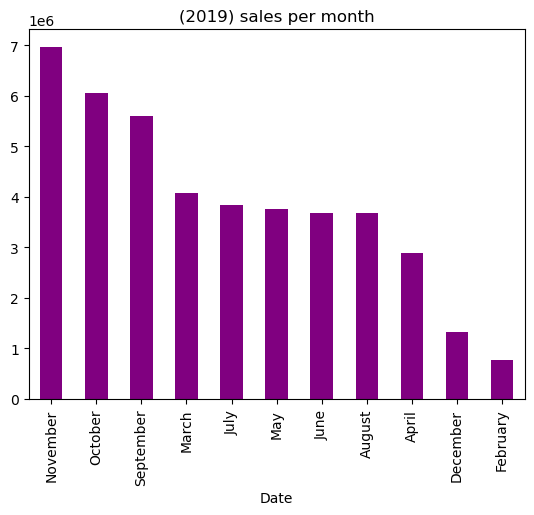

In [23]:
twenty19 = UK_Dataframe.loc[(UK_Dataframe['Date']>'2018-12-31')].reset_index()

twenty19.groupby(UK_Dataframe['Date'].dt.strftime('%B'))['Sales'].sum().sort_values(ascending=False).plot.bar(color='purple')
plt.title('(2019) sales per month')
plt.show()

In [24]:
UKdf = dataframe[UK]

Dec_sales = UKdf[UKdf['Date'] >= '2019-12-01']['Sales'].sum()
Nov_sales = UKdf[(UKdf['Date'] >= '2019-11-01') & (UKdf['Date'] < '2019-11-30')]['Sales'].sum()

print('December sales drop:', (Dec_sales-Nov_sales)/((Dec_sales+Nov_sales)/2)*100)

December sales drop: -113.64776519369539


Taking a look at the sales performance by month, we can notice the highest sales in the UK happened by the end of the year peaking in November with a maximun of £6.7M. However, sales dropped drastically by December (2019), respecting November sales with a difference of -114%. Lowest sales were in February with under £1M

## <span style="color:purple"> **CANCELLED ORDERS ANALYSIS** </span> 

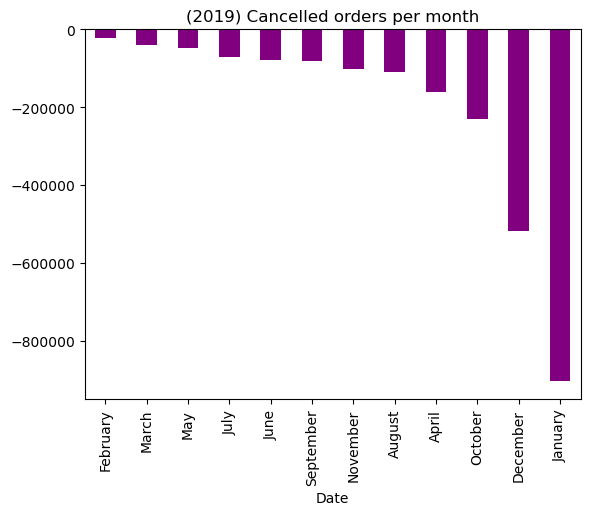

In [25]:
Cancel19 = Cancel_UK.loc[(Cancel_UK['Date']>'2018-12-31')].reset_index()

Cancel19.groupby(Cancel19['Date'].dt.strftime('%B'))['Sales'].sum().sort_values(ascending=False).plot.bar(color='purple')
plt.title('(2019) Cancelled orders per month')
plt.show()

In [26]:
Cancel19.groupby(Cancel19['Date'].dt.strftime('%B'))['Sales'].sum().sort_values(ascending=True)

Date
January     -904845.81
December    -517464.91
October     -229934.95
April       -160045.92
August      -108386.36
November    -101093.16
September    -80581.40
June         -79651.64
July         -70795.01
May          -46795.59
March        -39288.35
February     -22527.85
Name: Sales, dtype: float64

Sale cancellations are key to understand earnings and seasonality. During 2019, there were constant order cancellations but there were 2 specific months that had a way larger amount of them representing important losses for the business. The first big drop in was in January, where £905K were refunded due to cancellation, and later at the end of the year we saw another valley with a loss of £517K.

# <span style="color:purple"> **OUTSIDE OF THE UK SEASONALITY ANALYSIS** </span> 

## <span style="color:purple"> **SALES ANALYSIS** </span> 

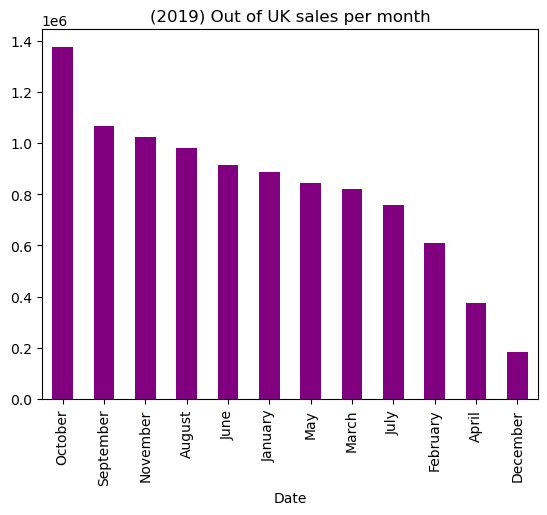

In [27]:
Twenty19 = Not_UK_Dataframe.loc[(Not_UK_Dataframe['Date']>'2018-12-31')].reset_index()

Twenty19.groupby(Twenty19['Date'].dt.strftime('%B'))['Sales'].sum().sort_values(ascending=False).plot.bar(color='purple')
plt.title('(2019) Out of UK sales per month')
plt.show()

In [28]:
Twenty19.groupby(Twenty19['Date'].dt.strftime('%B'))['Sales'].sum().sort_values(ascending=False)

Date
October     1375075.98
September   1067400.98
November    1022463.99
August       982031.25
June         915013.40
January      888488.94
May          842661.90
March        821620.35
July         757514.07
February     608467.18
April        375683.36
December     182853.09
Name: Sales, dtype: float64

In [29]:
UKDF = dataframe[Not_UK]

Dec_Sales = UKDF[UKDF['Date'] >= '2019-12-01']['Sales'].sum()
Nov_Sales = UKDF[(UKDF['Date'] >= '2019-11-01') & (UKDF['Date'] < '2019-11-30')]['Sales'].sum()

print('December sales drop:', (Dec_Sales-Nov_Sales)/((Dec_Sales+Nov_Sales)/2)*100)

December sales drop: -137.65054681679882


Just as previously mentioned, in the UK, there's an increase in sales by the end of the year getting to its maximum in October (£1.4M) but quickly decreasing by December, where we see our second biggest and most dramatic drop with only £179K earned (-138% compared to November). But there was another significant month where sales were lower than expected in April with  £375K.



## <span style="color:purple"> **CANCELLED ORDERS ANALYSIS** </span> 

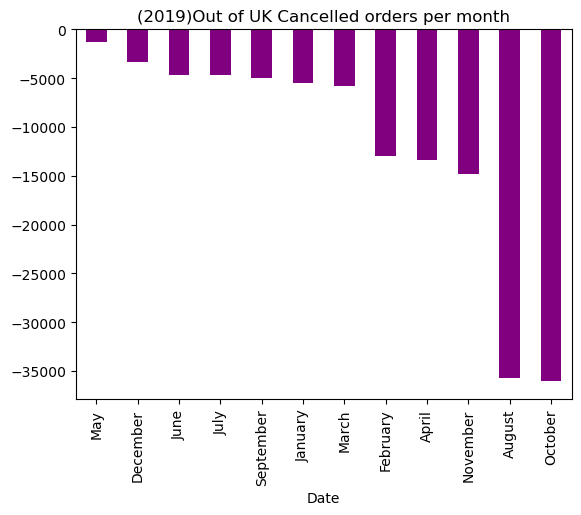

In [30]:
cancel19 = Cancel_Out_UK.loc[(Cancel_Out_UK['Date']>'2018-12-31')].reset_index()

cancel19.groupby(cancel19['Date'].dt.strftime('%B'))['Sales'].sum().sort_values(ascending=False).plot.bar(color='purple')
plt.title('(2019)Out of UK Cancelled orders per month')
plt.show()

In [31]:
cancel19.groupby(cancel19['Date'].dt.strftime('%B'))['Sales'].sum().sort_values(ascending=True)

Date
October     -36074.59
August      -35726.11
November    -14846.04
April       -13342.72
February    -12951.77
March        -5804.47
January      -5504.14
September    -5015.36
July         -4724.13
June         -4656.88
December     -3305.75
May          -1319.13
Name: Sales, dtype: float64

Outside of the UK we see an interesting increase on order cancelations by the third quarter of the year with 2 significantly large amounts returned in August (-£35.7K) and October (-£36K). These two months were interestingly good from a sales perspective, which proves that there's a higher sales volume at the end of the year, which also increases the amount of possible returns and order cancellations during these period which makes customer retainability a top priority

## <span style="color:purple"> **PRODUCT ANALYSIS** </span> 

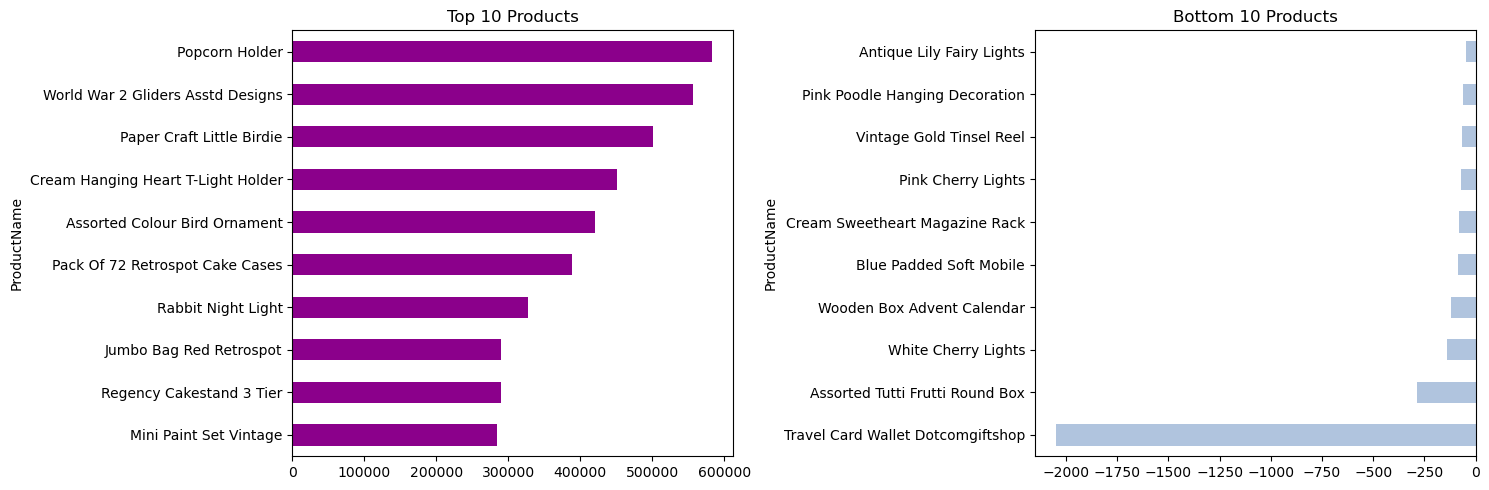

In [32]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

Sales_Top=dataframe.groupby(['ProductName'])['Sales'].sum().sort_values(ascending=True).tail(10)
Sales_Bot=dataframe.groupby(['ProductName'])['Sales'].sum().sort_values(ascending=True).head(10)

Sales_Top.plot(kind='barh', ax=axes[0], color='darkmagenta')
axes[0].set_title("Top 10 Products")
Sales_Bot.plot(kind='barh', ax=axes[1], color='lightsteelblue')
axes[1].set_title("Bottom 10 Products")

plt.tight_layout()

In [33]:
prod = dataframe.groupby(['ProductName'])['Sales'].sum().reset_index()
neg = prod[prod['Sales']<0]
print('Products with negative sales in 2019:', len(neg['ProductName'].unique()))
print('Total loss in sales 2019:', neg['Sales'].sum())

Products with negative sales in 2019: 22
Total loss in sales 2019: -3215.8300000000004


Out of the 3,768 products the business has to offer, the Popcorn Holder seemed to be the most popular one with £583K in sales, while the worst performing one was the Travel Card Wallet Dotcomgiftshop which represented by far, the largest loss in sales with -£2K. 

Unfortunately, 22 out of the 3,768 offered products represented a loss for the business rather than an income, with a total loss of -£3.2K at the end of the year in total for these type of products. Which could mean they are not meeting customers expectations or simply are not as popular or desired by buyers.

# <span style="color:purple"> **CUSTOMER LOYALTY ANALYSIS** </span> 

## <span style="color:purple"> **CUSTOMER LOYALTY UK ANALYSIS** </span> 

In [42]:
No = len(dataframe['CustomerNo'].unique())

TransactionsUK = UK_Dataframe.groupby(['CustomerNo'])['TransactionNo'].count()

TransactionsOUK = Not_UK_Dataframe.groupby(['CustomerNo'])['TransactionNo'].count()

Transactions = dataframe.groupby(['CustomerNo'])['TransactionNo'].count()

#Recurrent customers are customer who made >100 transactions in 2019
Rec = Transactions[Transactions>100].count()

print('The number of recurring customers globally during the year was:', Rec)
print('The recurrent customers percentage globally is:',(Rec/No)*100)
print('Recurrent customers total transactions globally:', Transactions[Transactions>100].sum())
print('Recurrent customer transaction percentage:', Transactions[Transactions>100].sum()/dataframe['TransactionNo'].count()*100)

The number of recurring customers globally during the year was: 1493
The recurrent customers percentage globally is: 31.50453682211437
Recurrent customers total transactions globally: 422729
Recurrent customer transaction percentage: 78.81588514962245


Giving a great insight of customer loyalty to the business since a total of 1.4K customers a regulars a 31% of the total customer base responsible for 78% of total transactions. 
Another important thing to notice from the average sales amount per transaction is how some customers tend to buy in bulk with very large total amounts, this customers might not buy very often but they definitely position themselves as top customers in just a few transactions. 

Average number of transaction UK (2019): 110.95471435206689
Average number of transaction out of UK (2019): 121.05084745762711


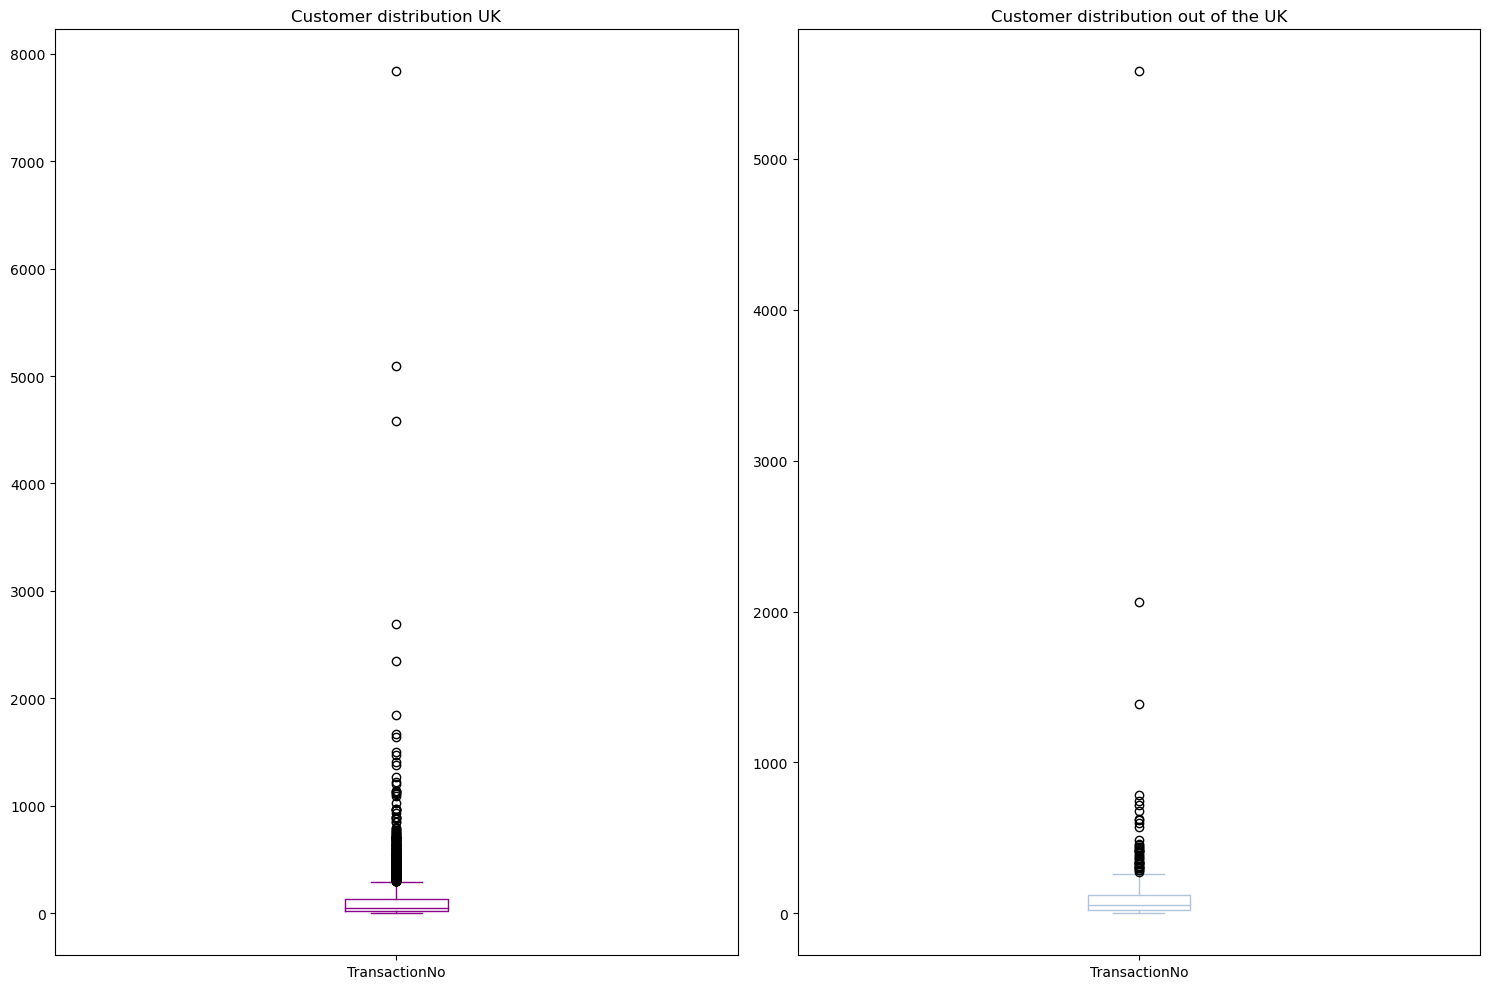

In [43]:
fig, axes = plt.subplots(1,2, figsize=(15,10))

TransactionsUK.plot(kind='box', ax=axes[0], color='darkmagenta')
axes[0].set_title("Customer distribution UK")
TransactionsOUK.plot(kind='box', ax=axes[1], color='lightsteelblue')
axes[1].set_title("Customer distribution out of the UK")

plt.tight_layout()

print('Average number of transaction UK (2019):', TransactionsUK.reset_index().TransactionNo.mean())
print('Average number of transaction out of UK (2019):', TransactionsOUK.reset_index().TransactionNo.mean())

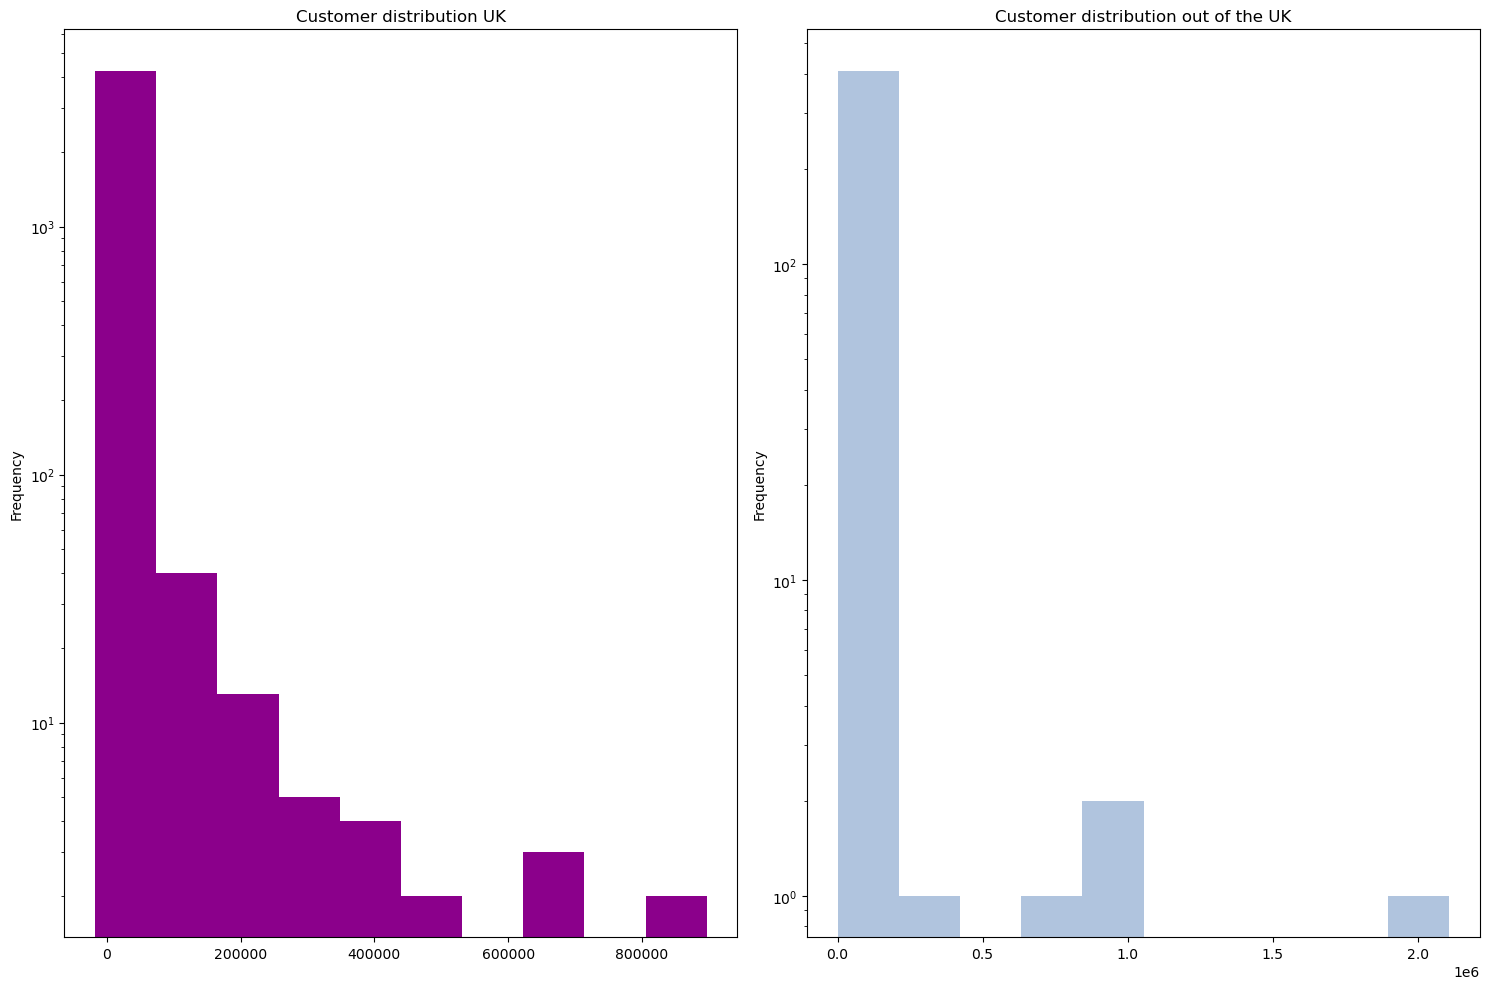

In [44]:

SalesUK = dataframe[UK].groupby(['CustomerNo'])['Sales'].sum()

SalesOUK = dataframe[Not_UK].groupby(['CustomerNo'])['Sales'].sum()

sales = dataframe.groupby(['CustomerNo'])['Sales'].sum()

#Recurrent customers are customer who made >100 transactions in 2019
rec = sales[Transactions>100]


fig, axes = plt.subplots(1,2, figsize=(15,10))

SalesUK.plot(kind='hist', ax=axes[0], color='darkmagenta', log=True)
axes[0].set_title("Customer distribution UK")
SalesOUK.plot(kind='hist', ax=axes[1], color='lightsteelblue', log=True)
axes[1].set_title("Customer distribution out of the UK")

plt.tight_layout()

In [45]:
print('Average sales per transaction per year (UK):', SalesUK.mean())
print('Average sales per transaction per year (Not UK):', SalesOUK.mean())

Average sales per transaction per year (UK): 11559.313334104047
Average sales per transaction per year (Not UK): 24845.396352657004


Another important thing to notice from the average sales amount per transaction is how some customers tend to buy in bulk with very large total amounts, this customers might not buy very often but they definitely position themselves as top customers in just a few transactions. 
However, most customers do small and medium scale purchases, which depending on the business' focus can be a positive or negative insight worth analyzing further

## <span style="color:purple"> **CUSTOMER CHURN ANALYSIS** </span> 

## <span style="color:purple"> **UK MICRO ANALYSIS** </span> 

Let's see what drove customer churn for the two months with the highest order cancellation amounts: January and December 

### <span style="color:purple"> **January** </span> 

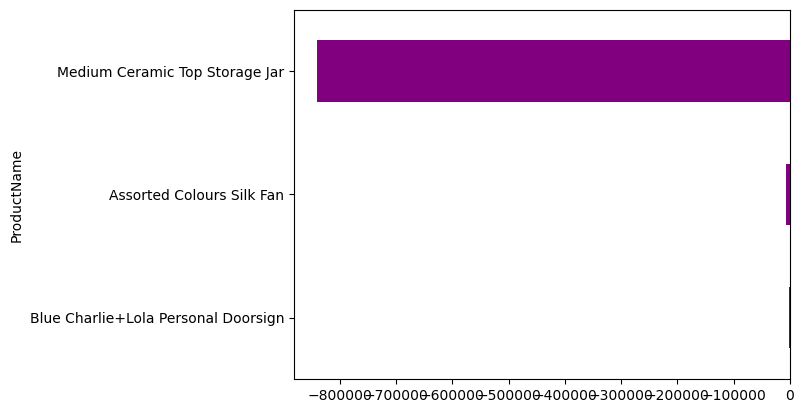

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Sales
319,C541433,2019-01-18,23166,Medium Ceramic Top Storage Jar,11.32,-74215,12346.0,United Kingdom,-840113.80


In [46]:
Jan = Cancel_UK.loc[(Cancel_UK['Date'] >= '2019-01-01') & (Cancel_UK['Date'] < '2019-02-01')].reset_index(drop=True)
Jan.groupby(['ProductName'])['Sales'].sum().sort_values(ascending=False).tail(3).plot.barh(color='purple')
plt.show()

Jan[Jan['ProductName']=='Medium Ceramic Top Storage Jar']

### <span style="color:purple"> **December** </span> 

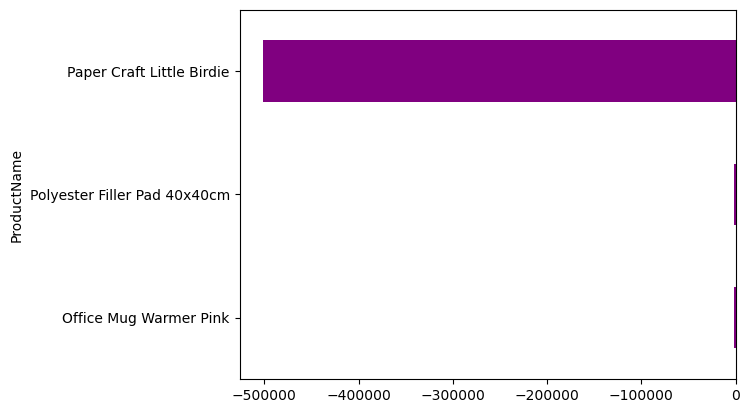

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Sales
0,C581484,2019-12-09,23843,Paper Craft Little Birdie,6.19,-80995,16446.0,United Kingdom,-501359.05


In [47]:
Dec = Cancel_UK.loc[(Cancel_UK['Date'] >= '2019-12-01') & (Cancel_UK['Date'] < '2019-12-31')].reset_index(drop=True)
Dec.groupby(['ProductName'])['Sales'].sum().sort_values(ascending=False).tail(3).plot.barh(color='purple')
plt.show()

Dec[Dec['ProductName']=='Paper Craft Little Birdie']


Churn analysis shows that the Medium Ceramic Top Storage Jar and the Paper Craft Little Birdie have been ordered in large amounts and then cancelled. In the case of the Paper Craft Little Birdie, there was only one large purchase of 80,995 units in December (UK). That order later got cancelled and £501.3k got refunded to the customer, which explained the drop in Sales we saw for the UK during that month. A similar situation happened during January in the UK where a large order for the Medium Ceramic Top Storage Jar got cancelled and then £840K got refunded to the customer.


## <span style="color:purple"> **OUT OF THE UK MICRO ANALYSIS** </span> 

Let's see what countries contributed the most to customer churn for the two months with the highest order cancellation amounts: August and October

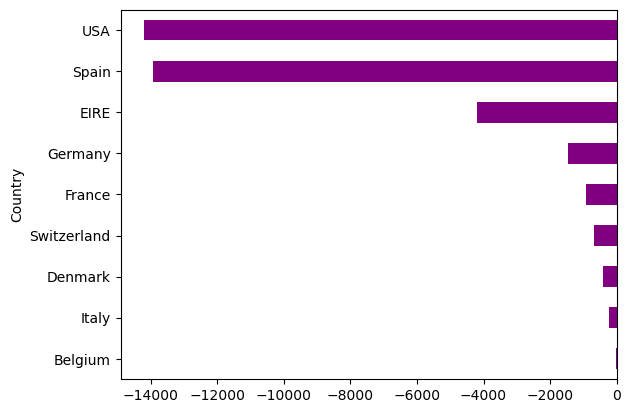

Country
USA           -14205.03
Spain         -13946.29
EIRE           -4191.95
Germany        -1462.24
France          -931.12
Switzerland     -674.00
Denmark         -414.74
Italy           -234.61
Belgium          -14.61
Name: Sales, dtype: float64

In [51]:
Oct = Cancel_Out_UK.loc[(Cancel_Out_UK['Date'] >= '2019-10-01') & (Cancel_Out_UK['Date'] < '2019-11-01')].reset_index()
Oct.groupby(['Country'])['Sales'].sum().sort_values(ascending=False).plot.barh(color='purple')
plt.show()

Oct.groupby(['Country'])['Sales'].sum().sort_values(ascending=True)

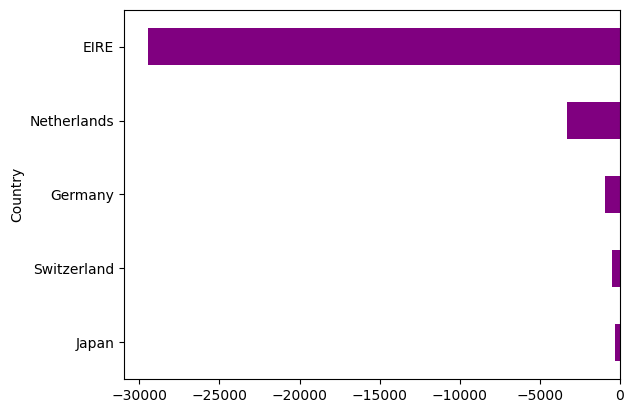

Country
EIRE          -29491.26
Netherlands    -3322.08
Germany         -941.61
Switzerland     -479.40
Japan           -321.77
Name: Sales, dtype: float64

In [57]:
Aug = Cancel_Out_UK.loc[(Cancel_Out_UK['Date'] >= '2019-08-01') & (Cancel_Out_UK['Date'] < '2019-09-01')].reset_index()
Aug.groupby(['Country'])['Sales'].sum().sort_values(ascending=False).tail(5).plot.barh(color='purple')
plt.show()
Aug.groupby(['Country'])['Sales'].sum().sort_values(ascending=True).head(5)

The first big increase in cancelled orders in August was caused mainly by customers in the EIRE since this country had a very high amount of cancelled orders representing close to £30K positioning itself as the country with the highes cancelled orders. Then, in October, the increase was caused by cancelled orders in Spain and the US, which only them combined, represented a loss of nearly £28K. However, Germany, France, and Australia were also worth looking into due to their high churn.


# <span style="color:purple"> **KEY TAKE AWAYS** </span> 

**Geography:** During 2019, the business had a total of £60M with over 520K transactions coming from 38 different countries. But sales were mostly concentrated in the United Kingdom (£49.9M).

**Seasonality:** The most sales were registered during the last quarter of the year. The best month was November with £6.7K (UK) and October with £1.3M (Not UK). Although right after, in December, sales dropped significantly by -115% (UK) and -139% (Not UK). Order cancellations rose at the end of the year as well as globally. However, in the UK, January presented a high increase in money refunded due to cancellation.

**Products:** The best selling product of 2019 was the Popcorn Holder with (£583K), while the worst performing product was the Travel Card Wallet dotcomgiftshop with (-£2K).

**Customer loyalty:** Most customers are occasional buyers, however there are 31% of recurring customers with over 100 purchases throughout the year. Most recurring customers are located in the United Kingdom.

**Customer Churn:** The Medium Ceramic Top Storage Jar and the Paper Craft Little Birdie were the two most cancelled products in the United Kingdom responsible for the highest peaks in churn during 2019, while outside of the UK, EIRE, Spain, and USA were the countries with most cancelled orders for the same period.